# Задание

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import numpy as np
import pandas as pd

In [74]:
data = pd.read_csv('/content/drive/MyDrive/credit_scoring.csv')
data.head(20)

,Имя,Возраст,Месячный доход
0,Николай,39,5600
1,Ольга,43,12000
2,Митя,17,15000
3,Вика,19,9600
4,Петр,21,20000
5,Кирилл,13,500


## Задание 1

<center><img src="../misc/images/simple-tree.png" width="440" height="440"/> <center/>

Клиенты, которым должны одобрить заявку на кредит: Ольга и Петр

In [75]:
x = data[(data['Возраст']>=18) & (data['Месячный доход']>10000)]
print("Клиенты, которым должны одобрить заявку на кредит:", x['Имя'].values)

Клиенты, которым должны одобрить заявку на кредит: ['Ольга' 'Петр']


## Задание 2

In [76]:
!pip install scikit-learn
from sklearn import datasets
iris = datasets.load_iris()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


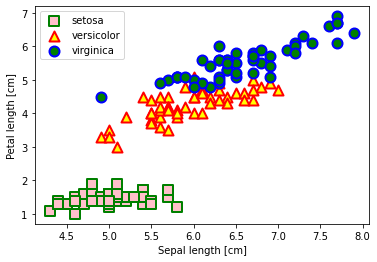

In [77]:
from pandas import DataFrame
import matplotlib.pyplot as plt
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
first = iris_frame[iris_frame['target'] == 0]
second = iris_frame[iris_frame['target'] == 1]
third = iris_frame[iris_frame['target'] == 2]
x1 = first['sepal length (cm)']
y1 = first ['petal length (cm)']
plt.scatter(x1, y1, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 100)
x2 = second['sepal length (cm)']
y2 = second['petal length (cm)']
plt.scatter(x2, y2, c ="yellow",
            linewidths = 2,
            marker ="^",
            edgecolor ="red",
            s = 100)
x3 = third['sepal length (cm)']
y3 = third['petal length (cm)']
plt.scatter(x3, y3, c ="green",
            linewidths = 2,
            marker ="o",
            edgecolor ="blue",
            s = 100)
plt.legend(["setosa" , "versicolor", "virginica"])
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.show()

In [78]:
fin = iris_frame.drop(columns = ['sepal width (cm)', 'petal width (cm)', 'target', 'name'])

## Задание 3

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(fin, iris_frame['target'],test_size=0.2, random_state=42)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print(round(accuracy,3))

0.967


## Задание 4

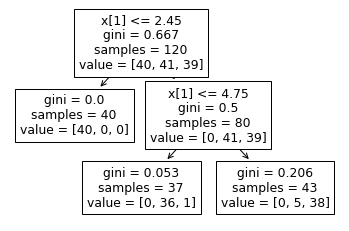

Количество листьев дерева:  3


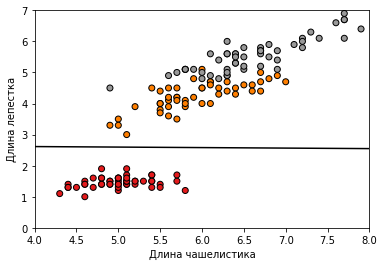

In [83]:
from sklearn import tree
from sklearn import svm
from sklearn import datasets
tree.plot_tree(clf)
plt.show()
n_leaves = clf.tree_.n_leaves
print("Количество листьев дерева: ", n_leaves)

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df[['sepal length (cm)', 'petal length (cm)']].values
y = iris.target

clf1 = svm.SVC(kernel='linear')
clf1.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Длина чашелистика')
plt.ylabel('Длина лепестка')

w = clf1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 8)
yy = a * xx - (clf1.intercept_[0]) / w[1]


plt.plot(xx, yy, 'k')

plt.xlim(4, 8)
plt.ylim(0, 7)

plt.show()

У получившегося дерева 3 листа

## Задание 5

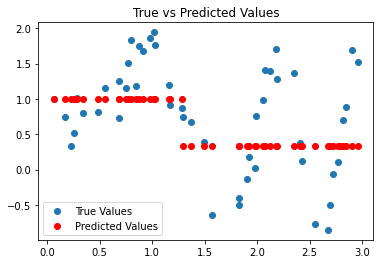

In [84]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

def generate_sin(sample_size, n=1):
    np.random.seed(42)
    X = np.random.random((sample_size, n))*3
    coeffs = 1 + 2 * np.random.random((n, 1))
    y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((sample_size, 1))
    return X, y



X, y = generate_sin(250)
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



fig, ax = plt.subplots()
ax.scatter(X_test, y_test, label='True Values')
ax.scatter(X_test, y_pred, color='r', label='Predicted Values')
ax.legend()
ax.set_title('True vs Predicted Values')
plt.show()

## Задание 6

MSE: 0.44151173144970934


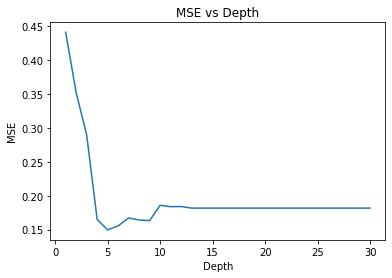

In [85]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


mse_values = []
for depth in range(1, 31):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)


fig, ax = plt.subplots()
ax.plot(range(1, 31), mse_values)
ax.set_title('MSE vs Depth')
ax.set_xlabel('Depth')
ax.set_ylabel('MSE')
plt.show()

Глубина дерева, на котором MSE на тестовой выборке наилучший: 5__

## Задание 7

MSE на тестовой выборке: 0.12085852532389833


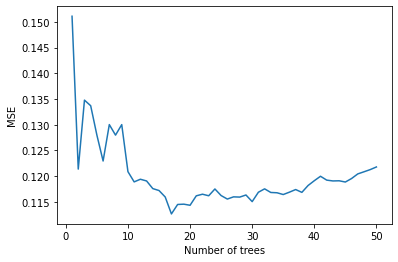

In [88]:
from sklearn.ensemble import BaggingRegressor

#Обучаем 10 деревьев решений глубиной 5
model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=10, bootstrap=True, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE на тестовой выборке:", mse)


mse_list = []
for n_estimators in range(1, 51):
    model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=n_estimators, bootstrap=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.plot(range(1, 51), mse_list)
plt.xlabel("Number of trees")
plt.ylabel("MSE")
plt.show()
#На графике мы можем видеть, что наилучшее качество модели достигается при количестве деревьев около 17-18.

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 17-18

## Задание 8

In [89]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=5, n_estimators=100, max_features=1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE на тестовой выборке:", round(mse,3))


MSE на тестовой выборке: 0.123
